[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/milestones/08-DWT/DWT_basis.ipynb)

# 2D-DWT basis
2-dimensional Discrete Wavelet Transform.

In [1]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import cv2 # pip install opencv-python
from scipy import ndimage

In [24]:
wavelet = "db5"
wavelet = "bior3.7"
pixels_in_y = 128
pixels_in_x = 128
levels = 3

In [25]:
img = np.zeros(shape=(pixels_in_y, pixels_in_x))
decomposition = pywt.wavedec2(img, wavelet=wavelet, level=levels, mode='per')

In [26]:
len(decomposition)

4

In [27]:
decomposition[0].shape

(16, 16)

In [28]:
decomposition[1][0].shape

(16, 16)

In [29]:
decomposition[1][1].shape

(16, 16)

In [30]:
decomposition[2][0].shape

(32, 32)

In [31]:
decomposition[3][0].shape

(64, 64)

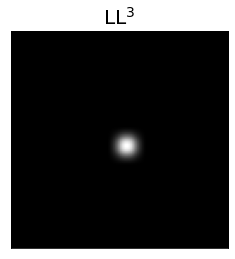

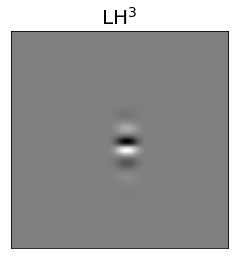

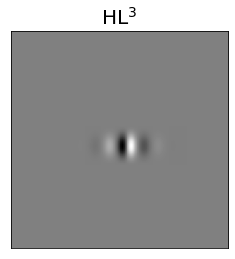

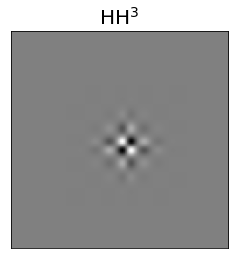

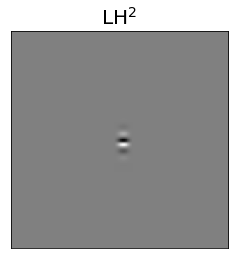

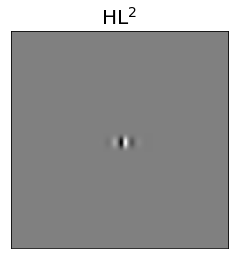

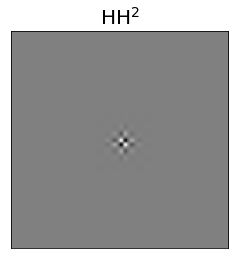

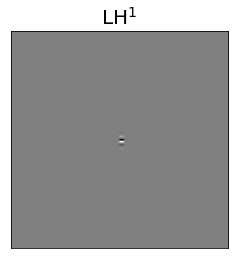

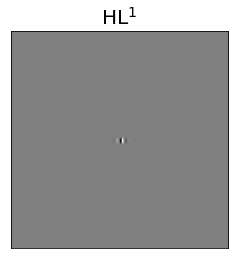

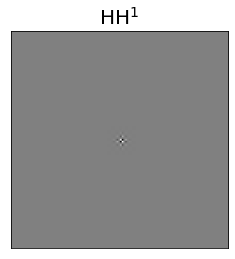

In [35]:
#view = np.empty(img.shape, 'uint8')

iterator = iter(decomposition)

# LL subband
LL = next(iterator)
LL[LL.shape[0]//2, LL.shape[1]//2] = 1
basis = pywt.waverec2(decomposition, wavelet=wavelet, mode="per")
LL[LL.shape[0]//2, LL.shape[1]//2] = 0
#x = basis[:,:]
#y = ((basis - basis.min()) / (basis.max() - basis.min())*255).astype('uint8')
#view[0:decomposition[0].shape[0], 0:decomposition[0].shape[1]] = \
#    y[(img.shape[0]//2)-4:(img.shape[0]//2)+4,
#      (img.shape[1]//2)-4:(img.shape[1]//2)+4]
#ndimage.zoom(y, 1.0/(1 << levels))
#plt.imshow(view, cmap=plt.cm.gray)
plt.title(f"LL$^{levels}$", fontsize=20)
plt.imshow(basis, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.savefig(f"LL{levels}.png")
plt.show()

resol = levels
for resolution in iterator:
    #print("R", resolution.shape)
    counter = 0
    for subband in resolution:
        #print("S", subband.shape)
        subband[subband.shape[0]//2, subband.shape[1]//2] = 1
        basis = pywt.waverec2(decomposition, wavelet=wavelet, mode="per")
        subband[subband.shape[0]//2, subband.shape[1]//2] = 0
        if (counter % 3) == 0:
            title = f"LH$^{resol}$"
            title_file = f"LH{resol}"
        elif (counter % 3) == 1:
            title = f"HL$^{resol}$"
            title_file = f"HL{resol}"
        else:
            title = f"HH$^{resol}$"
            title_file = f"HH{resol}"
        plt.title(title, fontsize=20)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(basis, cmap=plt.cm.gray)
        plt.savefig(f"{title_file}.png")
        plt.show()
        counter += 1
    resol -= 1